In [ ]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import seaborn as sns
from src import utils
from src.config import get_config

cfg = get_config()
cfg

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


                                                    Config                                                     
┏━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Key     ┃ Value                                                                                             ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ paths   │ {'db': 'data/database.db', 'log': './', 'pythonpath': 'E:/Python/mock_data_science_project'}      │
│ tables  │ {'churn': 'churn_data'}                                                                           │
│ general │ {'log_level': 'info', 'db_uri': 'sqlite:///E:/Python/mock_data_science_project/data/database.db'} │
└─────────┴───────────────────────────────────────────────────────────────────────────────────────────────────┘

In [10]:
engine = utils.create_engine(cfg.general.db_uri)
data = utils.Data(cfg.tables.churn, engine, "target")

[INFO] Reading data from churn_data
[INFO] Done


In [11]:
utils.check_basic_info(data.X)

DF shape & nulls
 ----------------
                 0
shape  (1000, 20)
nulls         NaN 
 ----------------


DF Dtypes
 ---------n feature_0     float64
feature_1     float64
feature_2     float64
feature_3     float64
feature_4     float64
feature_5     float64
feature_6     float64
feature_7     float64
feature_8     float64
feature_9     float64
feature_10    float64
feature_11    float64
feature_12    float64
feature_13    float64
feature_14    float64
feature_15    float64
feature_16    float64
feature_17    float64
feature_18    float64
feature_19    float64
dtype: object 
 ---------n
DF description
 ----------------
          feature_0    feature_1    feature_2    feature_3    feature_4  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -0.008362     0.194370     0.025338     0.055661    -0.042355   
std       1.023509     0.802559     0.986955     1.016759     1.014688   
min      -3.688365    -3.281236    -3.232565    -3.329504    -2.993707

In [13]:
data.target_count

[INFO] Count of y: {0: 699, 1: 301}


In [21]:
data.feature_count

[INFO] Count of features: 20


In [20]:
data.row_count

[INFO] Count of rows: 1000


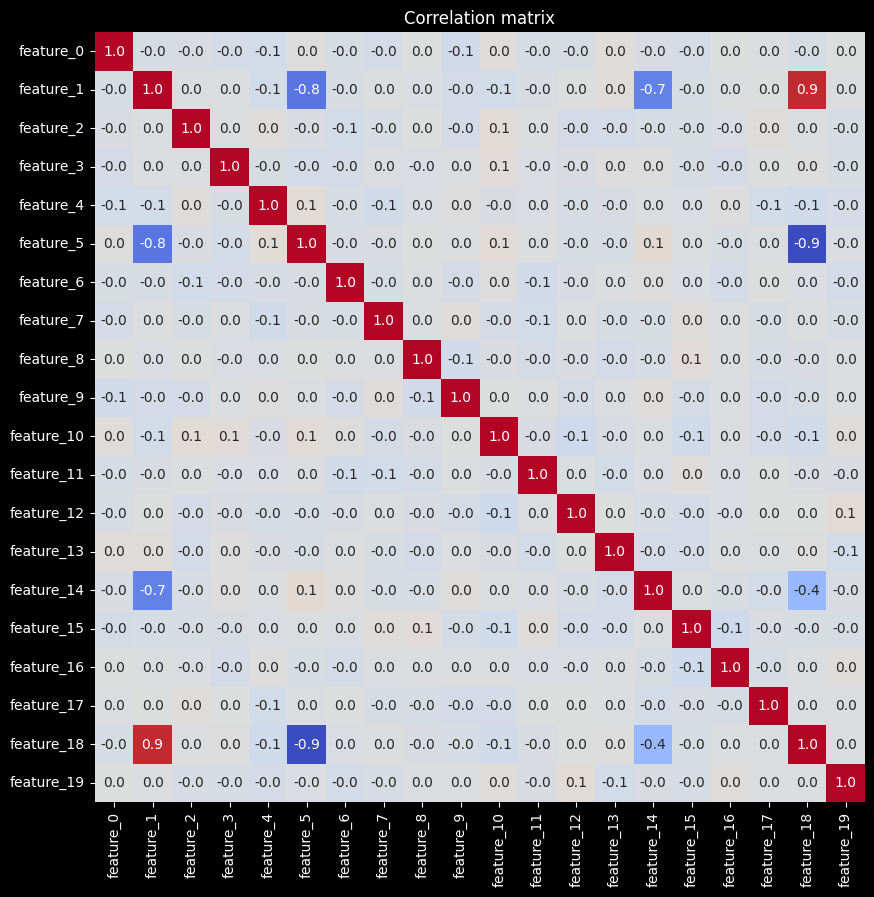

In [22]:
# Correlation matrix
corr = data.X.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".1f", square=True, cbar=False)
plt.title("Correlation matrix")
plt.show()

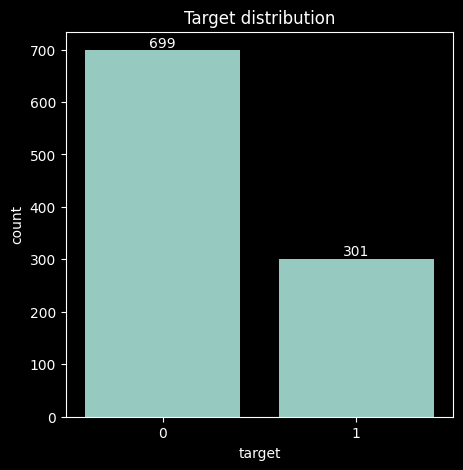

In [24]:
# Target distribution
plt.figure(figsize=(5, 5))
bar = sns.barplot(data.y.value_counts())
bar.bar_label(bar.containers[0])
plt.title("Target distribution")
plt.show()

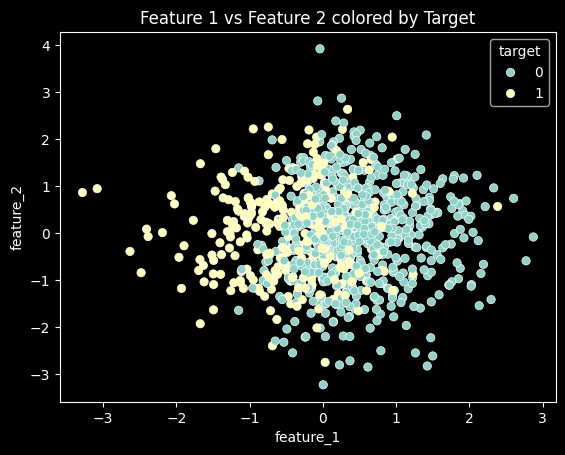

In [28]:
sns.scatterplot(x=data.X.feature_1, y=data.X.feature_2, hue=data.y)
plt.title("Feature 1 vs Feature 2 colored by Target")
plt.show()